In [1]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from us import states
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re

In [3]:
state_names = [state.name.lower() for state in states.STATES]
state_abbrs = [state.abbr for state in states.STATES]
city_df = pd.read_csv('PM25-Speciated/worldcities.csv')
city_names = city_df['city_ascii'].str.lower().tolist()  # First column
country_names = city_df['country'].str.lower().tolist()  # First column

In [4]:
stop_words = TfidfVectorizer(stop_words='english').get_stop_words()
stop_words = list(list(stop_words)+ city_names + country_names + state_names + state_abbrs)

# Original Data

In [5]:
DATASET_NAME = "SpeciateV5.3_PM_AE6.csv"

df = pd.read_csv('PM25-Speciated/specviate_v5_3datasets/'+DATASET_NAME, encoding='ISO-8859-1')

In [6]:
df

,Unnamed: 0,PROFILE_CODE,WEIGHT_PERCENT,UNCERTAINTY_PERCENT,SPECIES_NAME,SYMBOL,PROFILE_NAME,PROFILE_TYPE,TOTAL,REGION,CATEGORY_LEVEL_1_Generation_Mechanism,CATEGORY_LEVEL_2_Sector_Equipment,CATEGORY_LEVEL_3_.Fuel_Product
0,74033,3766AE6,0.001500,0.001200,Tin,Sn,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
1,74034,3766AE6,0.079200,0.021300,Sulfur,S,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
2,74035,3766AE6,0.133200,0.062900,Sulfate,SO4=,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
3,74038,3766AE6,0.000100,0.000200,Vanadium,V,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
4,74039,3766AE6,0.120300,0.095900,Potassium ion,K+,Forest Fire - AE6,PM-AE6,100.0,Northwestern Colorado,Combustion,Biomass Burning; Wildfire,Pinyon-juniper
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,347743,SUGP02,3.361345,0.504202,Sulfate,SO4=,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,100.0,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane
4132,347745,SUGP02,0.168067,0.084034,Magnesium,Mg,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,100.0,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane
4133,347747,SUGP02,0.168067,0.000000,Nitrate,NO3-,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,100.0,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane
4134,347750,SUGP02,2.184874,0.420168,Ammonium,NH4+,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,100.0,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane


In [7]:
df = df.pivot_table(index=['PROFILE_CODE', 'PROFILE_NAME'], columns='SPECIES_NAME', values='WEIGHT_PERCENT', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
df = df.fillna(0)

In [8]:
df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.000000,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.000000,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.000223,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.000154,0.045448,0.000927
229,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.001240,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000311,0.183862,0.000196
230,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.000117,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000060,0.032112,0.000267
231,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.000769,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000206,0.120127,0.000226


In [9]:
def clean_text(text):
    # Remove numbers and special characters
    text = re.sub(r'[^A-Za-z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [10]:
# df['name'] = df['name'].apply(clean_text)

In [11]:
df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.000000,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.000000,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.000223,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.000154,0.045448,0.000927
229,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.001240,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000311,0.183862,0.000196
230,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.000117,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000060,0.032112,0.000267
231,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.000769,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000206,0.120127,0.000226


In [12]:
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# text_cols = df.select_dtypes(include=[object]).columns

# print(text_cols)

# agg_funcs = {col: 'mean' for col in numeric_cols}
# agg_funcs.update({col: lambda x: np.random.choice(x) for col in text_cols if col != 'name'})

# pivot_df = df.groupby('name').agg(agg_funcs).reset_index()

In [13]:
# cols = list(pivot_df.columns)
# cols.insert(0, cols.pop(cols.index('code')))
# pivot_df = pivot_df[cols]
# pivot_df

In [14]:
pivot_df = df
pivot_df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.000000,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.000000,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.000223,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.000154,0.045448,0.000927
229,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.001240,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000311,0.183862,0.000196
230,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.000117,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000060,0.032112,0.000267
231,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.000769,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000206,0.120127,0.000226


In [15]:
pivot_df.iloc[:,2:47].head()

SPECIES_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,0.015400,0.110500,0.000500,0.0003,0.0,0.000100,0.369300,0.0,0.207,0.0,...,0.0,0.062000,0.0122,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.0
1,0.771625,0.000000,0.019000,0.0000,0.0,0.003958,0.259125,0.0,0.000,0.0,...,0.0,0.000000,0.0000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.0
2,0.000000,0.000000,0.061466,0.0000,0.0,0.023641,1.912530,0.0,0.000,0.0,...,0.0,0.340426,0.0000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.0
3,0.000000,1.791897,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.000,0.0,...,0.0,0.000000,0.0000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.000,0.0,...,0.0,0.017300,0.0107,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.0


# Clustering based on numeric values

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [17]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['PROFILE_NAME']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [18]:
X = pivot_df.iloc[:, 2:45]
#scaler = StandardScaler()
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [19]:
X

SPECIES_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Selenium,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,0.207000,0.0,...,0.000000,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.000000
1,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.000000
2,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,0.000000,0.0,...,0.000000,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.000000
3,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,0.000000,0.0,...,0.000223,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.000154,0.045448,0.000927
229,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,0.000000,0.0,...,0.001240,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000311,0.183862,0.000196
230,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,0.000000,0.0,...,0.000117,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000060,0.032112,0.000267
231,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,0.000000,0.0,...,0.000769,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000206,0.120127,0.000226


In [20]:
model = NMF(n_components=32, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X)
H = model.components_

# What features to use for clustering

In [21]:
# Assuming 'target' is the category column, and 'name' is the label
X = pivot_df.iloc[:, 2:45]
#X = W

In [22]:
n_clusters = 16
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
pivot_df['speciated_cluster'] = kmeans.fit_predict(X)

# Create a new column for cluster names
pivot_df['speciated_cluster_name'] = pivot_df['speciated_cluster'].apply(assign_cluster_name)

pivot_df.head()

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium,speciated_cluster,speciated_cluster_name
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.0003,0.0,0.000100,0.369300,0.0,...,0.0122,0.0,0.133200,0.0792,0.001500,0.000100,0.002900,0.0,1,Tire Dust
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.0000,0.0,0.003958,0.259125,0.0,...,0.0000,0.0,38.032500,0.0000,0.013281,1.515625,0.018250,0.0,13,Marine Vessel - Main Engine - Heavy Fuel Oil
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.0000,0.0,0.023641,1.912530,0.0,...,0.0000,0.0,12.078014,0.0000,0.035461,0.082742,0.200946,0.0,8,Marine Vessel - Auxiliary Engine - Marine Gas ...
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.0000,0.0,0.000000,0.000000,0.0,...,0.0000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.0,1,Tire Dust
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,...,0.0107,0.0,0.044100,0.0147,0.000000,0.000000,0.007760,0.0,1,Tire Dust


In [23]:
# for cluster_num in range(n_clusters):
#     print(f"\nCluster {cluster_num}:")
#     cluster_texts = pivot_df[pivot_df['speciated_cluster'] == cluster_num]['PROFILE_NAME']
#     for text in cluster_texts:
#         print(f" - {text}")

# Hierarchical Clustering

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
plt.rcParams['font.family'] = 'Sans'

/home/das90/.conda/envs/cent7/2020.11-py38/py311cu117pyg200/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


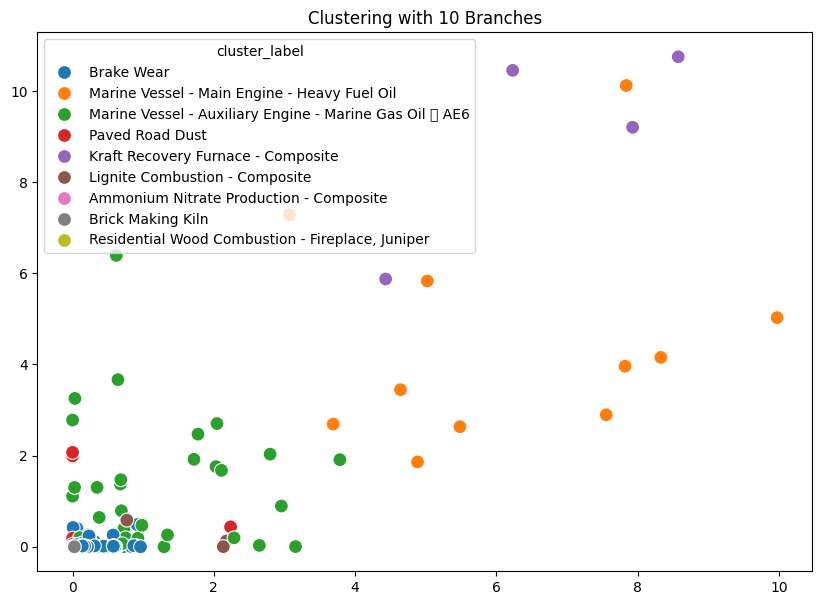

In [25]:
# Assuming 'target' is the category column, and 'name' is the label
# X = pivot_df.iloc[:, 2:47]

# Perform Agglomerative Clustering with more branches (e.g., 5 clusters)
max_clusters = 10
#clustering = AgglomerativeClustering(n_clusters=max_clusters, linkage='ward')
clustering = AgglomerativeClustering(n_clusters=max_clusters, linkage='ward', metric='euclidean')
pivot_df['cluster'] = clustering.fit_predict(X)

# Assign majority name within each cluster
def get_majority_label(cluster, names):
    return Counter(names).most_common(1)[0][0]

cluster_majority_labels = {
    cluster: get_majority_label(cluster, pivot_df[pivot_df['cluster'] == cluster]['PROFILE_NAME'])
    for cluster in range(max_clusters)
}

# Replace cluster numbers with majority names
pivot_df['cluster_label'] = pivot_df['cluster'].map(cluster_majority_labels)

# Plot the clusters (using seaborn scatter plot for visualization)
plt.figure(figsize=(10, 7))

# Initialize NMF and fit to the data
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_


sns.scatterplot(data=pivot_df, x=W[:, 0], y=W[:, 1], hue='cluster_label', palette='tab10', s=100)
plt.title(f'Clustering with {max_clusters} Branches')
plt.show()


## Dendogram Hierarchy

Cluster 0: Representative Name = Marine Vessel - Main Engine - Heavy Fuel Oil, Number of Items = 7
Cluster 1: Representative Name = Marine Vessel - Auxiliary Engine - Marine Gas Oil  AE6, Number of Items = 22
Cluster 2: Representative Name = Lignite Combustion - Composite, Number of Items = 11
Cluster 3: Representative Name = Brake Wear, Number of Items = 13
Cluster 4: Representative Name = Kraft Recovery Furnace - Composite, Number of Items = 4
Cluster 5: Representative Name = Residential Wood Combustion - non-EPA Certified Woodstove, Almond, Number of Items = 9
Cluster 6: Representative Name = Agricultural Burning - Wheat Straw - China, Number of Items = 5
Cluster 7: Representative Name = Unpaved Road Dust - Composite, Number of Items = 19
Cluster 8: Representative Name = Residential Wood Combustion - Fireplace, Oak, Number of Items = 4
Cluster 9: Representative Name = Brake Wear, Number of Items = 6
Cluster 10: Representative Name = Distillate Oil Combustion - Composite, Number of 

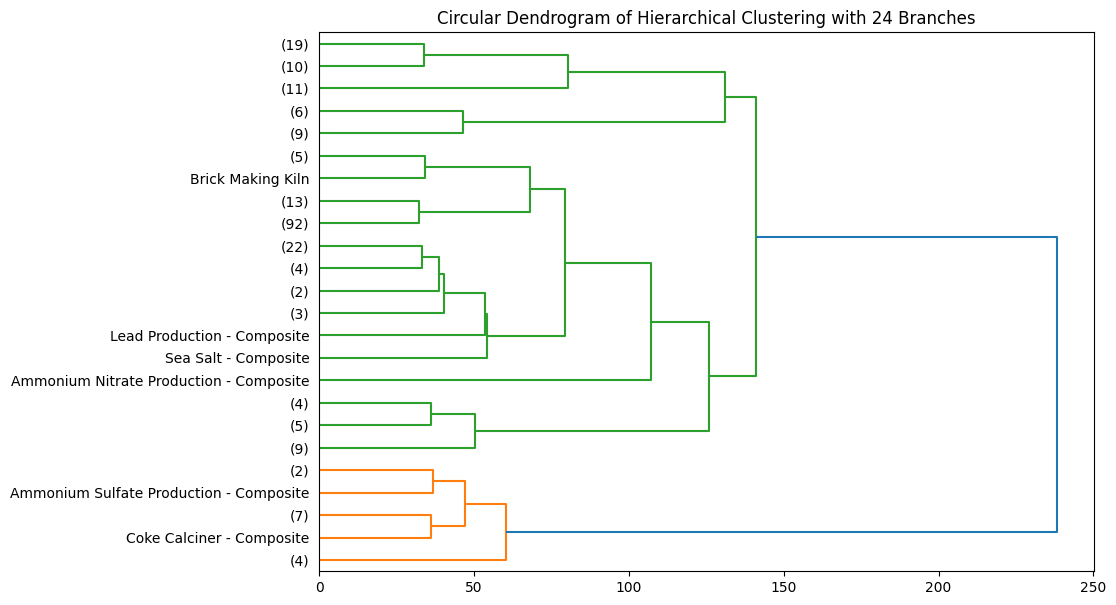

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'target' is the category column, and 'name' is the label
# X = pivot_df.iloc[:, 2:47]

# Perform Agglomerative Clustering with more branches (e.g., 5 clusters)
max_clusters = 24
clustering = AgglomerativeClustering(n_clusters=max_clusters, linkage='ward')
pivot_df['cluster'] = clustering.fit_predict(X)

# Assign majority name within each cluster
def get_majority_label(cluster, names):
    return Counter(names).most_common(1)[0][0]

cluster_majority_labels = {}
for cluster in range(max_clusters):
    cluster_names = pivot_df[pivot_df['cluster'] == cluster]['PROFILE_NAME']
    majority_label = get_majority_label(cluster, cluster_names)
    cluster_majority_labels[cluster] = majority_label
    # Print cluster representative name and count of items in cluster
    print(f"Cluster {cluster}: Representative Name = {majority_label}, Number of Items = {len(cluster_names)}")

# Replace cluster numbers with majority names
pivot_df['cluster_label'] = pivot_df['cluster'].map(cluster_majority_labels)

# Generate the linkage matrix
Z = linkage(X, method='ward')

# Plot the circular dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=max_clusters, labels=pivot_df['cluster_label'].values, leaf_font_size=10, orientation='right')
plt.title(f'Circular Dendrogram of Hierarchical Clustering with {max_clusters} Branches')
plt.show()


### Dendogram of all points

/home/das90/.conda/envs/cent7/2020.11-py38/py311cu117pyg200/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


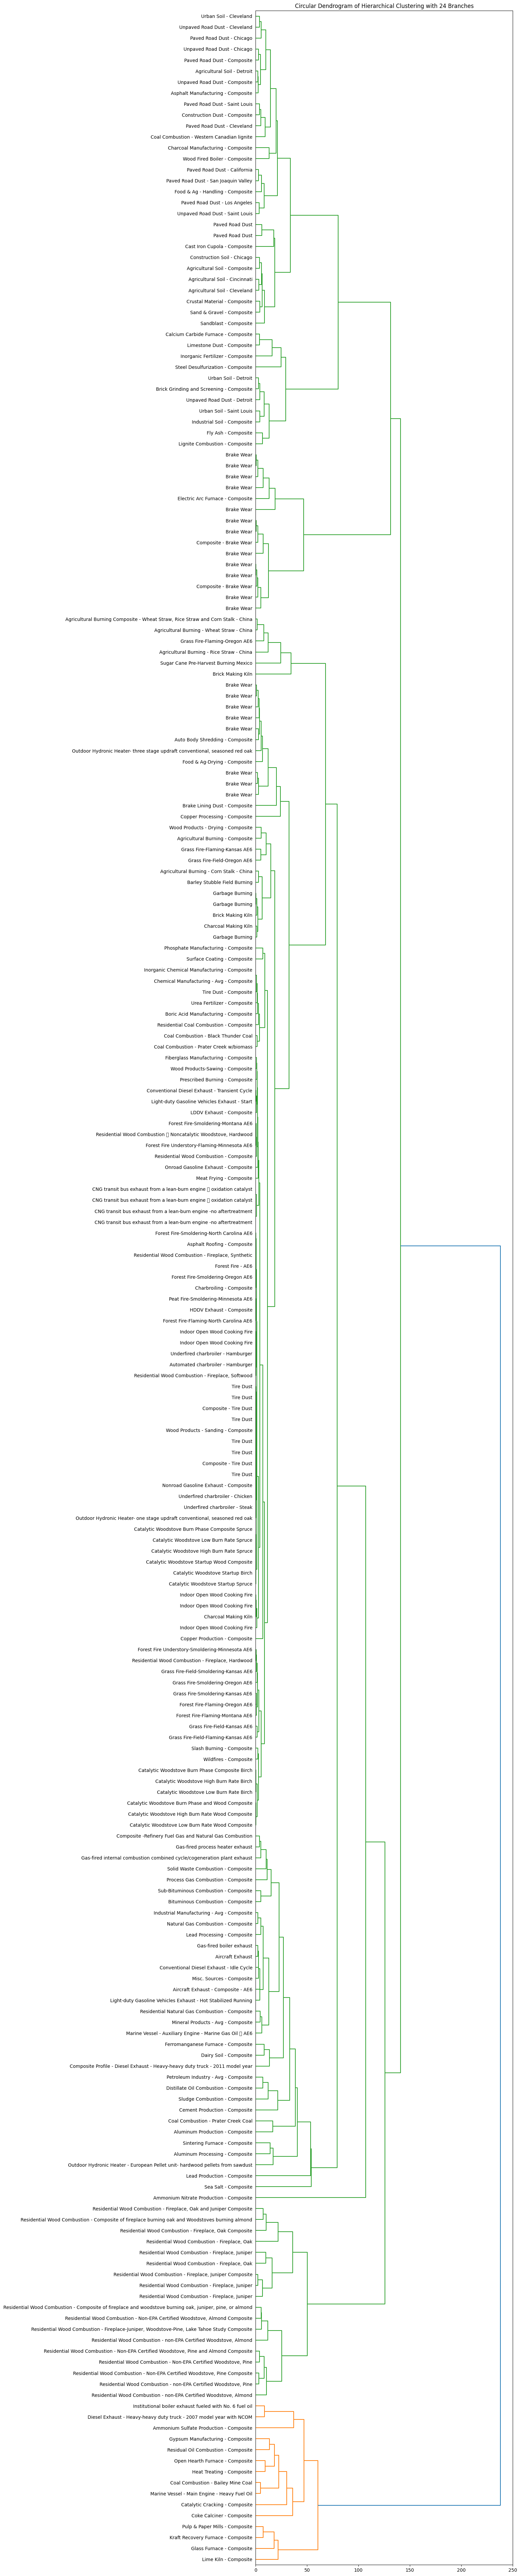

In [27]:
plt.figure(figsize=(10, 100))
dendrogram(Z, labels=pivot_df['PROFILE_NAME'].values, leaf_font_size=10, orientation='right')
plt.title(f'Circular Dendrogram of Hierarchical Clustering with {max_clusters} Branches')
plt.show()


## Print Top k representatives within each clusters

Cluster 0: Representative Names = Marine Vessel - Auxiliary Engine - Marine Gas Oil  AE6 (1), Number of Items = 33

Cluster 1: Representative Names = Residential Wood Combustion - Fireplace, Juniper (3), Number of Items = 18

Cluster 2: Representative Names = Paved Road Dust (2), Number of Items = 29

Cluster 3: Representative Names = Brake Wear (12), Number of Items = 15

Cluster 4: Representative Names = Marine Vessel - Main Engine - Heavy Fuel Oil (1), Number of Items = 11

Cluster 5: Representative Names = Ammonium Nitrate Production - Composite (1), Number of Items = 1

Cluster 6: Representative Names = Lignite Combustion - Composite (1), Number of Items = 11

Cluster 7: Representative Names = Brick Making Kiln (1), Number of Items = 6

Cluster 8: Representative Names = Brake Wear (8), Number of Items = 105

Cluster 9: Representative Names = Kraft Recovery Furnace - Composite (1), Number of Items = 4



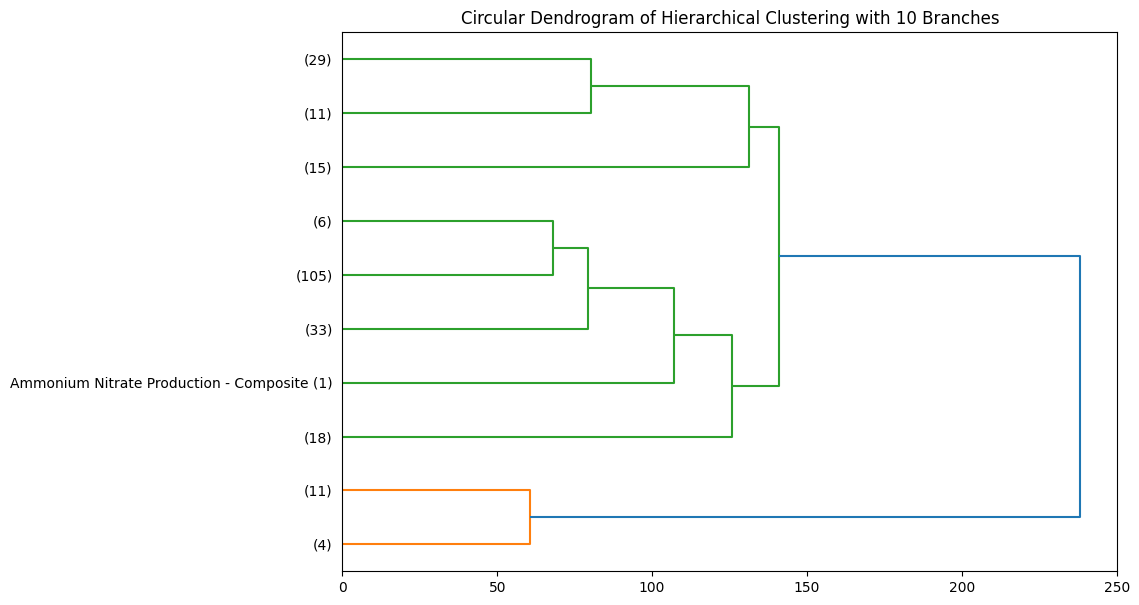

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'target' is the category column, and 'name' is the label
# X = pivot_df.iloc[:, 2:47]

# Perform Agglomerative Clustering with more branches (e.g., 20 clusters)
max_clusters = 10
clustering = AgglomerativeClustering(n_clusters=max_clusters, linkage='ward')
pivot_df['cluster'] = clustering.fit_predict(X)

# Modify the get_majority_label function to return top k labels with their counts
def get_top_k_labels(cluster, names, k=3):
    counter = Counter(names).most_common(k)
    return [(label, count) for label, count in counter]

cluster_majority_labels = {}
k = 1  # Choose the number of majority names to show

for cluster in range(max_clusters):
    cluster_names = pivot_df[pivot_df['cluster'] == cluster]['PROFILE_NAME']
    top_k_labels = get_top_k_labels(cluster, cluster_names, k)
    
    # Combine top k labels into a string format 'Label1 (Count1), Label2 (Count2), ...'
    majority_label_str = ', '.join([f"{label} ({count})" for label, count in top_k_labels])
    
    cluster_majority_labels[cluster] = majority_label_str
    
    # Print cluster representative names and counts
    print(f"Cluster {cluster}: Representative Names = {majority_label_str}, Number of Items = {len(cluster_names)}")
    print("")

# Replace cluster numbers with majority names and their counts
pivot_df['cluster_label'] = pivot_df['cluster'].map(cluster_majority_labels)

# Generate the linkage matrix
Z = linkage(X, method='ward')

# Plot the circular dendrogram with updated labels
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p= max_clusters, labels=pivot_df['cluster_label'].values, leaf_font_size=10, orientation='right')
plt.title(f'Circular Dendrogram of Hierarchical Clustering with {max_clusters} Branches')
plt.show()


## k-NN Graph Construction

In [29]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from scipy.sparse.linalg import svds

In [33]:
# Apply SVD to X
U, S, VT = svds(X.values, k=16)
X_svd = U @ np.diag(S) @ VT

In [34]:
X = X_svd

In [35]:
# Compute KNN

K = 3
knn = NearestNeighbors(n_neighbors=K)  # You can change the number of neighbors
knn.fit(X)
distances, indices = knn.kneighbors(X)

# Create a graph
G = nx.Graph()

# Add nodes with PROFILE_NAME as labels
for i, profile_name in enumerate(df['PROFILE_NAME']):
    G.add_node(i, label=profile_name)

# Add edges based on KNN
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if i != neighbor:  # Avoid self-loops
            G.add_edge(i, neighbor)

In [36]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend

In [37]:
# pos = nx.spring_layout(G)  # Layout for visualization
# labels = nx.get_node_attributes(G, 'label')

# plt.figure(figsize=(50, 50))
# nx.draw(G, pos, with_labels=True, labels=labels, node_size=100, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
# plt.title('K-Nearest Neighbor Graph')
# plt.show()

In [38]:
# nx.write_graphml(G, 'knn_graph.graphml')


labels=[]
y = [i for i in pivot_df['PROFILE_NAME']]
labels = dict(zip(range(len(y)), y))

# print(labels)

nx.set_node_attributes(G, labels, 'labels')
print("Writing gephi....")

nx.write_gexf(G, DATASET_NAME+"KNN"+str(K)+'.gexf')
print("Done....")

Writing gephi....
Done....


## Data preprocessing

In [39]:
category_for_classification = 'speciated_cluster_name' 
#'assigned_profile', #'speciated_cluster_name'

In [40]:
# # Step 1: Read the CSV into a pandas dataframe

# filename = 'PM25-Speciated/IMPROVEDataset/usepa_final_with_assigned_profile.csv'
# df = pd.read_csv(filename)

In [41]:
# df

In [42]:
# Create a dictionary to map categories to numerical values
category_mapping = {category: index for index, category in enumerate(pivot_df[category_for_classification].unique())}

In [43]:
# Replace string categories with numerical values
pivot_df['final_profile'] = pivot_df[category_for_classification].map(category_mapping)

# The updated DataFrame and the mapping dictionary
print(category_mapping)
pivot_df

{'Tire Dust': 0, 'Marine Vessel - Main Engine - Heavy Fuel Oil': 1, 'Marine Vessel - Auxiliary Engine - Marine Gas Oil \x96 AE6': 2, 'Diesel Exhaust - Heavy-heavy duty truck - 2007 model year with NCOM': 3, 'Paved Road Dust': 4, 'Kraft Recovery Furnace - Composite': 5, 'Lignite Combustion - Composite': 6, 'Brake Wear': 7, 'Catalytic Cracking - Composite': 8, 'Ammonium Nitrate Production - Composite': 9, 'Sea Salt - Composite': 10, 'Lead Production - Composite': 11, 'Brick Making Kiln': 12, 'Agricultural Burning - Wheat Straw - China': 13, 'Residential Wood Combustion - Fireplace, Juniper': 14}


SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sulfur,Tin,Vanadium,Zinc,Zirconium,speciated_cluster,speciated_cluster_name,cluster,cluster_label,final_profile
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.0792,0.001500,0.000100,0.002900,0.000000,1,Tire Dust,8,Brake Wear (8),0
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.0000,0.013281,1.515625,0.018250,0.000000,13,Marine Vessel - Main Engine - Heavy Fuel Oil,4,Marine Vessel - Main Engine - Heavy Fuel Oil (1),1
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.0000,0.035461,0.082742,0.200946,0.000000,8,Marine Vessel - Auxiliary Engine - Marine Gas ...,0,Marine Vessel - Auxiliary Engine - Marine Gas ...,2
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0000,0.000000,0.000000,0.000000,0.000000,1,Tire Dust,0,Marine Vessel - Auxiliary Engine - Marine Gas ...,0
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0147,0.000000,0.000000,0.007760,0.000000,1,Tire Dust,8,Brake Wear (8),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.0000,0.010290,0.000154,0.045448,0.000927,1,Tire Dust,8,Brake Wear (8),0
229,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.0000,0.008238,0.000311,0.183862,0.000196,1,Tire Dust,8,Brake Wear (8),0
230,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.0000,0.001160,0.000060,0.032112,0.000267,1,Tire Dust,8,Brake Wear (8),0
231,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.0000,0.005265,0.000206,0.120127,0.000226,1,Tire Dust,8,Brake Wear (8),0


In [44]:
len(category_mapping)

15

In [45]:
mapping_category = {value:key for key, value in category_mapping.items()}

In [46]:
# Step 2: Apply Non-negative matrix factorization on the data except last column
# Handle missing values by filling them with the mean of the column
# df.fillna(df.mean(), inplace=True)

In [47]:
# Separate features and target
X = pivot_df.iloc[:, 2:45].values
y = pivot_df['final_profile'].values

In [48]:
print(X.shape)
print(y.shape)

(233, 43)
(233,)


## NMF

In [ ]:
# # Initialize NMF and fit to the data
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_

# # Visualize the data
# plt.scatter(W[:, 0], W[:, 1], c=y)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('NMF Components')
# plt.colorbar()
# plt.show()

## MLP

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random
import numpy as np

In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Example usage
set_seed(42)

In [ ]:
# Step 3: Use PyTorch MLP to classify the last column
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = torch.FloatTensor(X_scaled)
y = torch.LongTensor(y)

In [ ]:
# Assuming X and y are already defined as PyTorch tensors
# X = features tensor
# y = labels tensor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:

# Define a simple MLP model for multi-class classification
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 256),
            nn.ReLU(),
            nn.Linear(256, len(category_mapping))  # Adjusted for 29 classes
        )
        
    def forward(self, x):
        return self.layers(x)

# Initialize the model
model = MLP()

In [ ]:
model

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def train():
    # Training loop
    for epoch in range(1000):  # number of epochs can be adjusted
        for batch_idx, (data, target) in enumerate(train_loader):
            # Forward pass
            output = model(data)
            loss = criterion(output, target)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

# train()

In [ ]:
def test():
    model.eval()
    test_loss = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            all_targets.extend(target.tolist())
            all_predictions.extend(output.argmax(dim=1).tolist())

    test_loss /= len(test_loader.dataset)
    print(f"Test Loss: {test_loss}")

    # Calculate F1 score
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    print(f"F1 Score: {f1}")
    
    return all_predictions, all_targets
    
# pred, target = test()

In [ ]:
# for i, j in zip(pred, target):
#     print("Pred:",mapping_category[i],"\n","True:",mapping_category[j])
#     print()